(150, 2)
[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] [0 0 0 0 0 0 0 0 0 0]


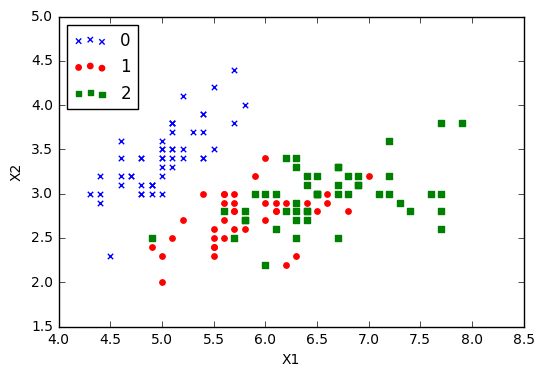

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#load datasets
iris = load_iris() #一种花的数据集
data = iris.data[:,:2]
target = iris.target
print(data.shape) #(150,2)
print(data[:10])
print(target,target[:10])
 
label = np.array(target)
index_0 = np.where(label==0)
plt.scatter(data[index_0,0],data[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label==1)
plt.scatter(data[index_1,0],data[index_1,1],marker='o',color = 'r',label = '1',s = 15)
index_2 =np.where(label==2)
plt.scatter(data[index_2,0],data[index_2,1],marker='s',color = 'g',label = '2',s = 15)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

随机抽取一部分作为“测试集”（X_test），留着最后模型评估。然后再用交叉验证，验证正确率。

（注意，这个数据集就有分布规律，0-50为0类，50-100为1类，100-150为2类，所以用了随机选取打乱了分布）

In [41]:
#split the train sets and test sets,
from sklearn import neighbors as knn
from sklearn.model_selection import train_test_split

# Split arrays or matrices into random train and test subsets
X, X_test, y, y_test = train_test_split(data, target, test_size=0.2, random_state=1) 
print(X.shape,X_test.shape)
print(y.shape,y_test.shape)

#cross validation
folds = 4
k_choices = [1,3,5,7,9,13,15,20,25]
 
X_folds = []
y_folds = []
 
X_folds = np.vsplit(X, folds) # 120*2 变成 4*(30*2)
y_folds = np.hsplit(y, folds) # 1*120 变成 4*30
print(np.shape(X_folds), np.shape(y_folds))
print(X_folds)

accuracy_of_k = {}
for k in k_choices:
    accuracy_of_k[k] = [] #字典的值部分均为list
    
#split the train sets and validation sets
for i in range(folds): #4折交叉验证（留一法）
    #训练集
    X_train =np.vstack(X_folds[:i] + X_folds[i+1:])  #Stack arrays in sequence vertically (row wise)
    X_val = X_folds[i] #验证集
    y_train = np.hstack(y_folds[:i] + y_folds[i+1:]) #Stack arrays in sequence horizontally (column wise)
    #训练集
    y_val = y_folds[i] #验证集
    print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)
    for k in k_choices:
        classify = knn.KNeighborsClassifier(k)
        classify.fit(X_train,y_train)
        y_val_pred = classify.predict(X_val)
        accuracy = np.mean(y_val_pred == y_val)
        accuracy_of_k[k].append(accuracy)
        
for k in sorted(k_choices):
    for accuracy in accuracy_of_k[k]:
        print('k = %d,accuracy = %f'%(k,accuracy))

(120, 2) (30, 2)
(120,) (30,)
(4, 30, 2) (4, 30)
[array([[ 6.1,  3. ],
       [ 7.7,  3. ],
       [ 5.6,  2.5],
       [ 6.4,  2.8],
       [ 5.8,  2.8],
       [ 5.3,  3.7],
       [ 5.5,  2.3],
       [ 5.2,  3.4],
       [ 6.5,  2.8],
       [ 6.7,  2.5],
       [ 6.8,  3. ],
       [ 5.1,  3.5],
       [ 6. ,  2.2],
       [ 6.3,  2.9],
       [ 6.6,  2.9],
       [ 7.7,  2.6],
       [ 5.7,  3.8],
       [ 5. ,  3.6],
       [ 4.8,  3. ],
       [ 5.2,  2.7],
       [ 5.1,  3.4],
       [ 5.5,  3.5],
       [ 7.7,  3.8],
       [ 6.9,  3.1],
       [ 7.3,  2.9],
       [ 6.4,  2.8],
       [ 6.2,  2.8],
       [ 6. ,  3.4],
       [ 7.7,  2.8],
       [ 5.7,  3. ]]), array([[ 4.8,  3.4],
       [ 5.7,  2.5],
       [ 6.3,  2.7],
       [ 4.8,  3. ],
       [ 4.7,  3.2],
       [ 6.5,  3. ],
       [ 4.6,  3.4],
       [ 6.1,  3. ],
       [ 6.5,  3.2],
       [ 6.7,  3.1],
       [ 5.7,  2.8],
       [ 6.7,  3.3],
       [ 6. ,  3. ],
       [ 5.1,  3.8],
       [ 6. ,  2.2],
   

In [6]:
x = [1,2,3,4,5,6]
v = np.vstack(x[:1]+x[2:])
print(x[:1]+x[2:])
print(v)
h = np.hstack(x[:1]+x[2:])
print(h)

[1, 3, 4, 5, 6]
[[1]
 [3]
 [4]
 [5]
 [6]]
[1 3 4 5 6]


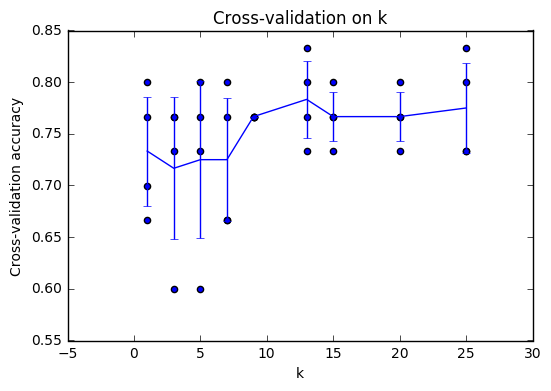

In [35]:
#show the plot
import matplotlib.pyplot as plt
#show the accuracy 
for k in k_choices:
    plt.scatter([k]*len(accuracy_of_k[k]), accuracy_of_k[k])

#均值
accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracy_of_k.items())]) #Return a new list containing all items from the iterable in ascending order.
#标准差
accuracies_std = np.array([np.std(v) for k,v in sorted(accuracy_of_k.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std) #绘制误差图
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

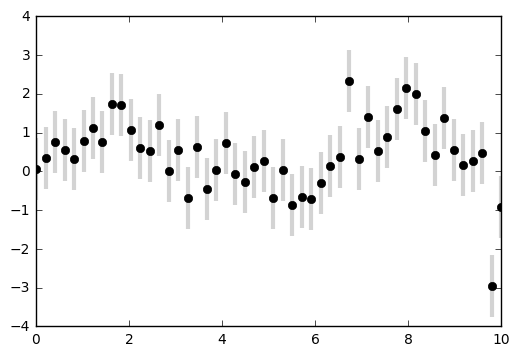

In [31]:
x = np.linspace(0, 10, 50) #start, stop, num
dy = 0.8 
y = np.sin(x) + dy * np.random.randn(50) #1*50的标准正态随机数
# plt.errorbar(x, y, yerr=dy, fmt='.k')
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

In [24]:
#we chose the best one
best_k = 13
classify = knn.KNeighborsClassifier(best_k)
classify.fit(X_train,y_train)
y_test_pred = classify.predict(X_test)
num_correct = np.sum(y_test==y_test_pred)
accuracy_test = np.mean(y_test==y_test_pred)
print('test accuracy is %d/%d = %f'%(num_correct,X_test.shape[0],accuracy_test))


test accuracy is 24/30 = 0.800000


总之：交叉验证可以帮助我们进行超参数的调优和模型选择！